In [1]:
#importing useful libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
df = pd.read_csv("hypothyroid.csv")

In [4]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


- we can see many columns has value "?". we will replace "?" with NaN

In [5]:
df = df.replace('?', np.NaN)

In [6]:
#counting number of "?" left.
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count ==0:
        print(column, df[column][df[column]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH_measured 0
TSH 0
T3_measured 0
T3 0
TT4_measured 0
TT4 0
T4U_measured 0
T4U 0
FTI_measured 0
FTI 0
TBG_measured 0
TBG 0
referral_source 0
Class 0


- looks like all "?" are successfully replaced by NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [8]:
df.isna().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

- we can see that whole TBG column contains only NaN values, so we consider that TBG column is not important. So we are dropping TBG column 

- Columns like 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', and 'TBG_measured'  have only T and F value.
- These columns represent whether the respective column constain a value or not. So we can drop these columns also.

In [9]:
df = df.drop(columns=['TBG','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured', 'referral_source'])

In [10]:
#converting male(M) =1, female(F) =0
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

In [11]:
#converting all f & t into 0 & 1 respectively.
for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})

In [12]:
#getting all the unique values of Class cloumn
df["Class"].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [13]:
encode = LabelEncoder().fit(df['Class'])

df['Class'] = encode.transform(df['Class'])

# we will save the encoder as pickle to use when we do the prediction. We will need to decode the predcited values
# back to original

file = "enc.pickle"
pickle.dump(encode, open(file, "wb"))

In [14]:
dict(zip(encode.classes_,range(len(encode.classes_))))

{'compensated_hypothyroid': 0,
 'negative': 1,
 'primary_hypothyroid': 2,
 'secondary_hypothyroid': 3}

In [15]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125,1.14,109,1
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2,102,NaN,NaN,1
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109,0.91,120,1
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175,NaN,NaN,1
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61,0.87,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,1
3768,68,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2.1,124,1.08,114,1
3769,74,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.1,1.8,112,1.07,105,1
3770,72,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.7,2,82,0.94,87,1


In [16]:
# replacing missing values by using KNN Imputer
imp = KNNImputer(n_neighbors=3, weights= 'uniform', missing_values= np.nan)
df_p = pd.DataFrame(data = np.round(imp.fit_transform(df)), columns= df.columns)

In [17]:
df_p

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0,1.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,108.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,3.0,112.0,1.0,117.0,1.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,124.0,1.0,114.0,1.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,2.0,112.0,1.0,105.0,1.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,82.0,1.0,87.0,1.0


In [18]:
df_p.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.306999,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.009014,0.025451,0.000265,0.048780,4.824761,2.023860,108.528102,1.020944,110.361877,0.974814
std,20.082478,0.461310,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.094525,0.157510,0.016282,0.215437,23.324246,0.791739,35.026694,0.165546,32.269298,0.279508
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,88.000000,1.000000,93.000000,1.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,104.000000,1.000000,107.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,124.000000,1.000000,124.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,530.000000,11.000000,430.000000,2.000000,395.000000,3.000000


- here we observed that maximum age is 455 in age column, age cannot be 455 so we drop that row

In [19]:
df_p = df_p.drop(index=1364)

In [20]:
df_p.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,...,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000
mean,51.630337,0.307080,0.123044,0.013259,0.011403,0.038982,0.014055,0.014055,0.015646,0.062053,...,0.009016,0.025457,0.000265,0.048793,4.825776,2.023866,108.525590,1.020949,110.363564,0.974808
std,18.980673,0.461344,0.328532,0.114397,0.106187,0.193577,0.117732,0.117732,0.124117,0.241283,...,0.094537,0.157531,0.016284,0.215464,23.327256,0.791844,35.030999,0.165567,32.273412,0.279544
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,88.000000,1.000000,93.000000,1.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,104.000000,1.000000,107.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,124.000000,1.000000,124.000000,1.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,530.000000,11.000000,430.000000,2.000000,395.000000,3.000000


In [21]:
df_p.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

- Now there are no missing values left

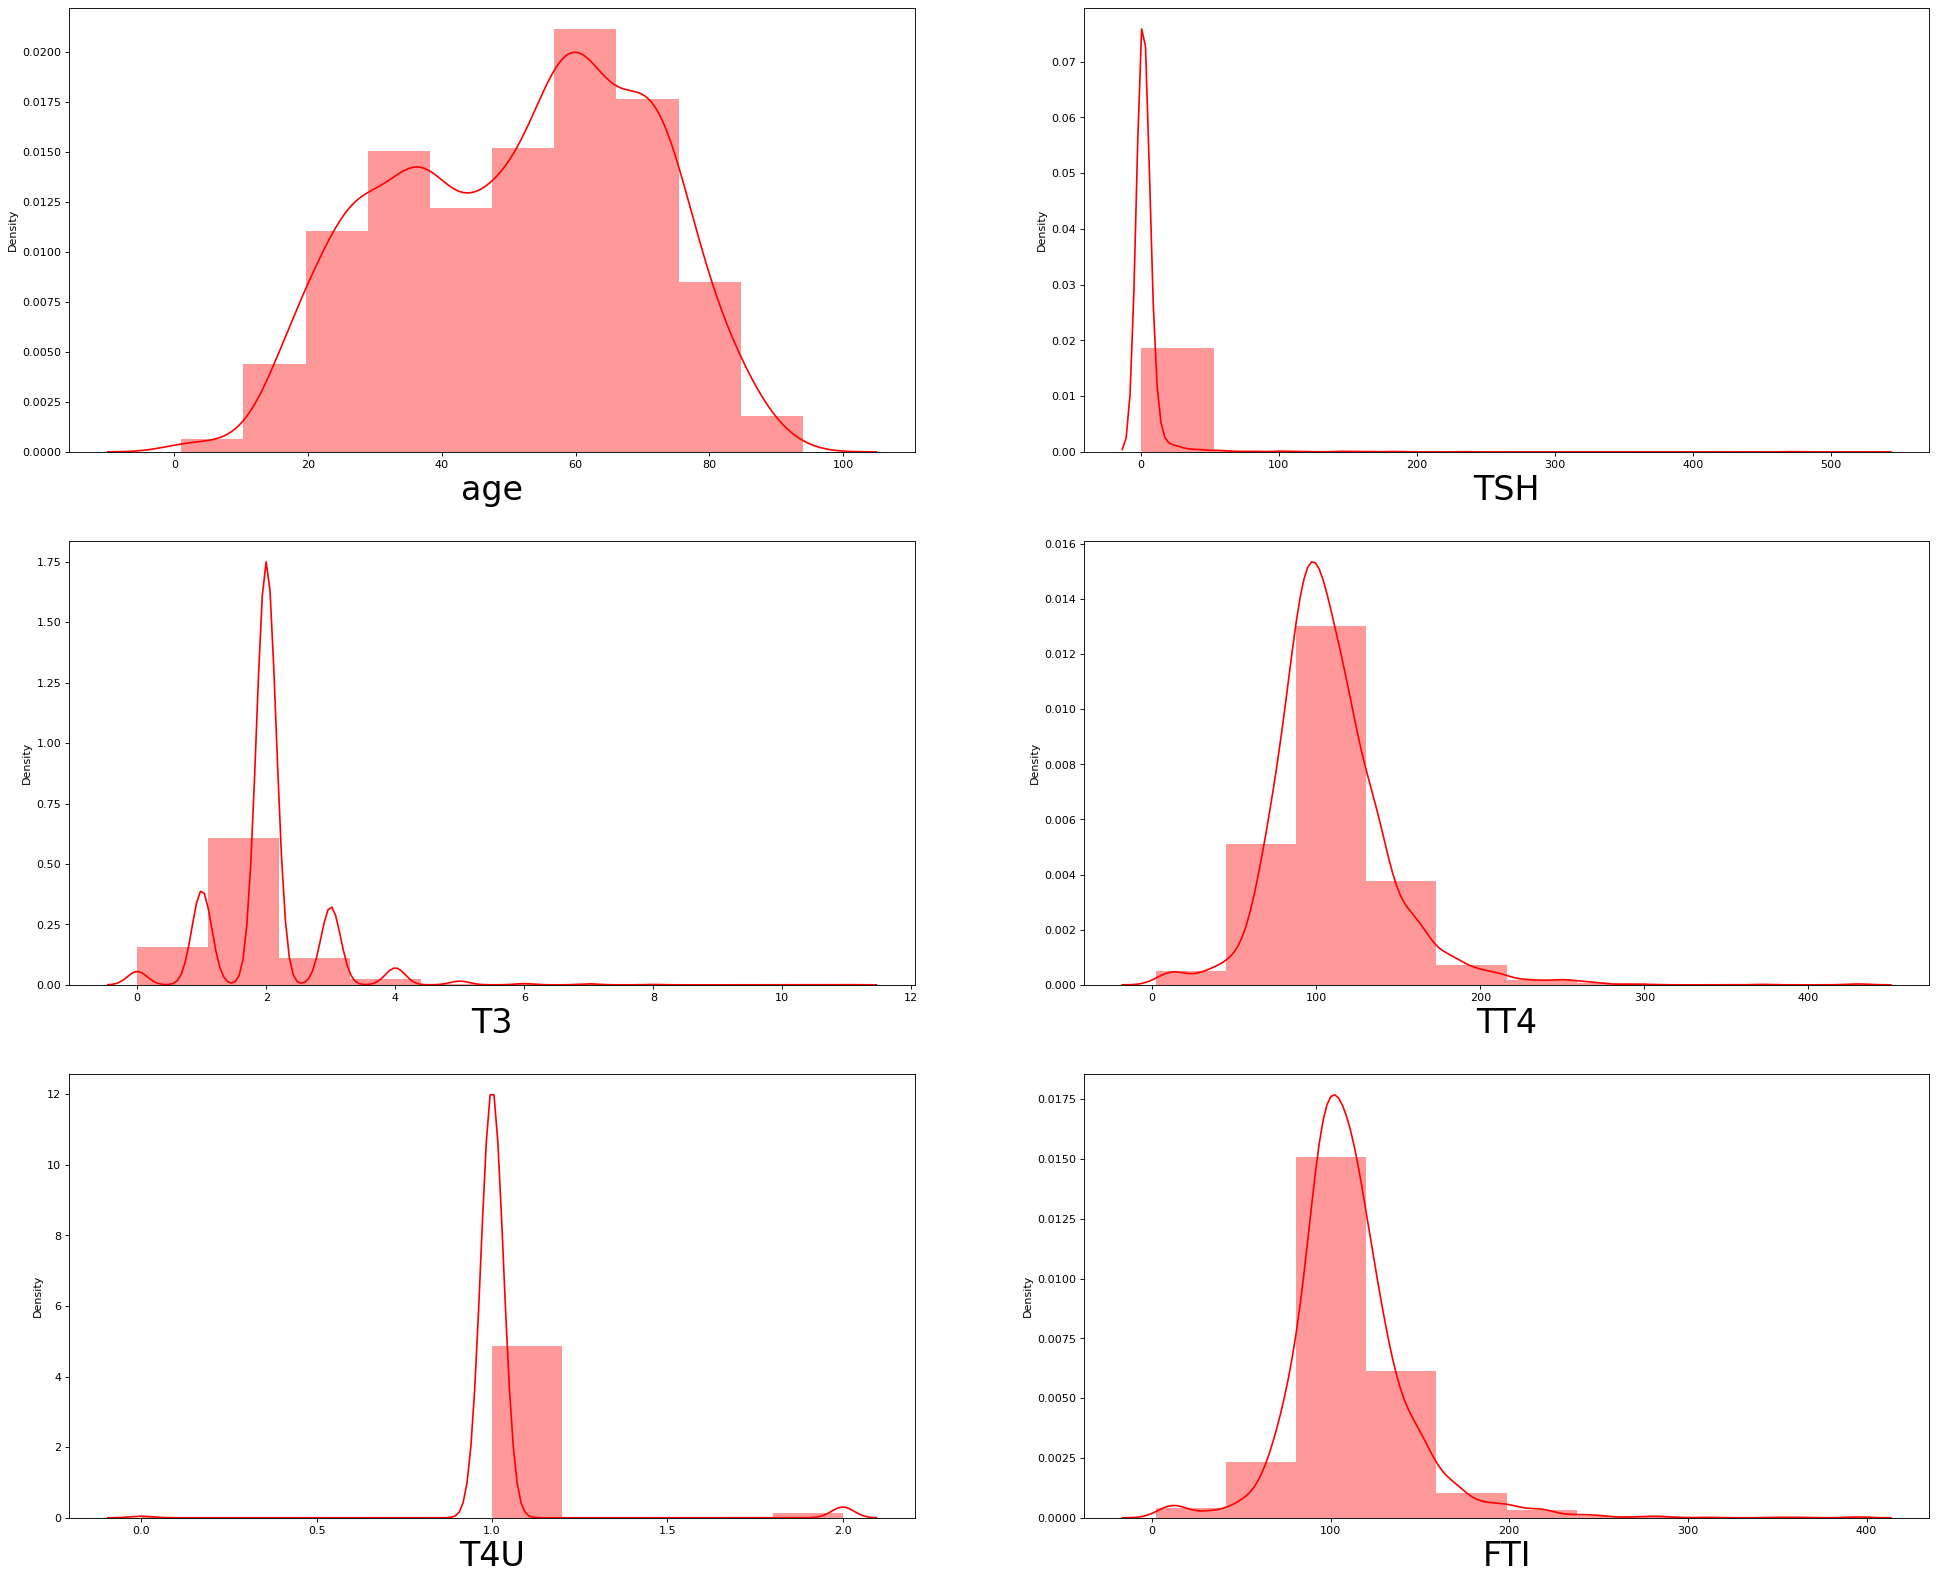

In [22]:
#checking skewness of the numerical columns

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(30, 25), dpi= 80)
plotnumber = 1
for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df_p[column], bins=10, kde=True, color = 'red')
    plt.xlabel(column, fontsize=30)
    plotnumber+=1
plt.show()

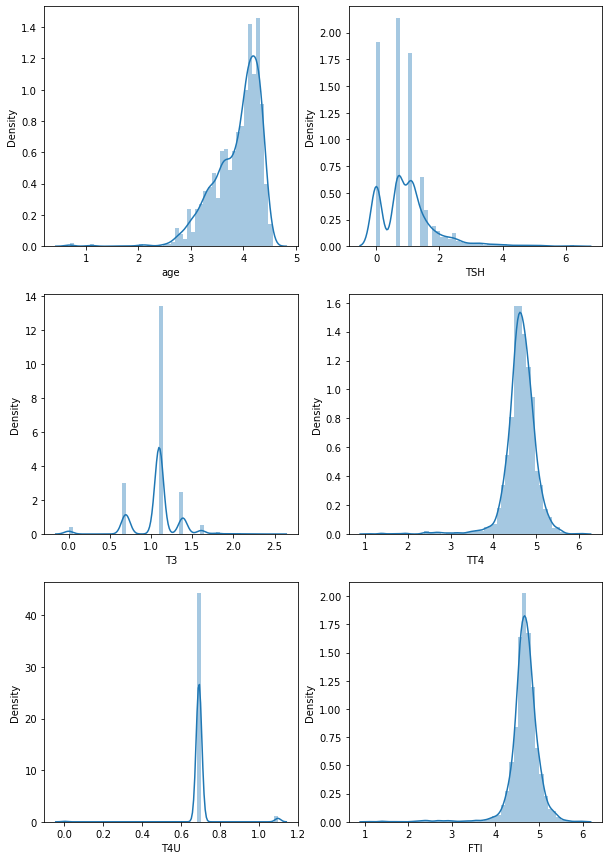

In [23]:
#taking log to remove the skewness

plt.figure(figsize=(10,15),facecolor='white')
pltnumber = 1

for column in columns:
    df_p[column]+=1
    ax = plt.subplot(3,2,pltnumber)
    sns.distplot(np.log(df_p[column]))
    plt.xlabel(column,fontsize=10)
    pltnumber+=1
plt.show()

- TSH column is still heavely skewed so we drop it

In [24]:
df_p = df_p.drop(['TSH'],axis=1)

In [25]:
df_p.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'Class'],
      dtype='object')

In [26]:
import plotly.express as px

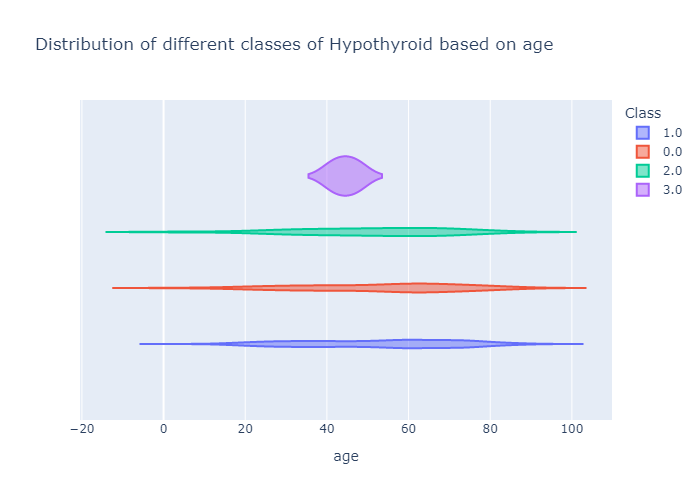

In [39]:
fig = px.violin(df_p, x="age", color = "Class",
                title="Distribution of different classes of Hypothyroid based on age")
fig.show("png") 

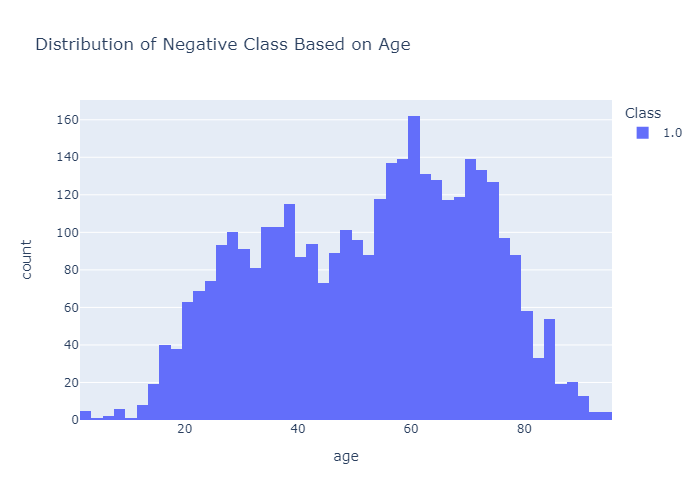

In [40]:
negative_df = df_p[df_p.Class==1]
fig = px.histogram(negative_df, x="age", color = "Class", pattern_shape= 'Class',
                title="Distribution of Negative Class Based on Age")
fig.show("png")

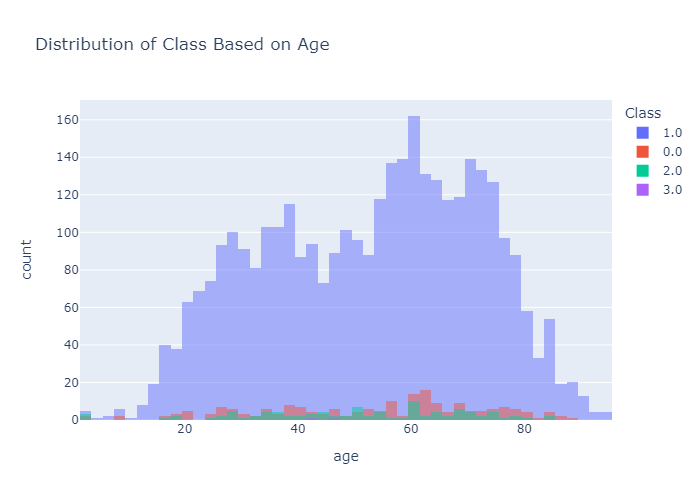

In [41]:
fig = px.histogram(df_p, x="age", color = "Class", barmode= 'overlay',
                title="Distribution of Class Based on Age")
fig.show("png") 

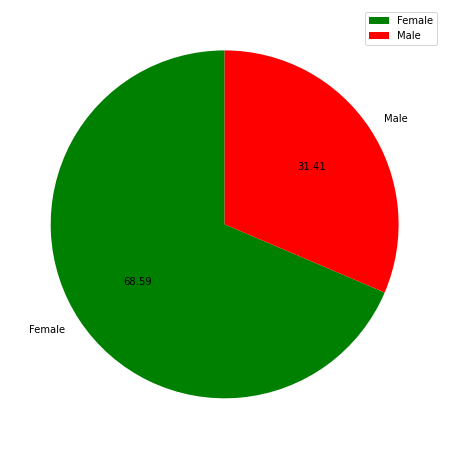

In [30]:
plt.figure(figsize=(10,8))
plt.pie(x=negative_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['green','red'],
        autopct='%.2f'
       );
plt.legend();

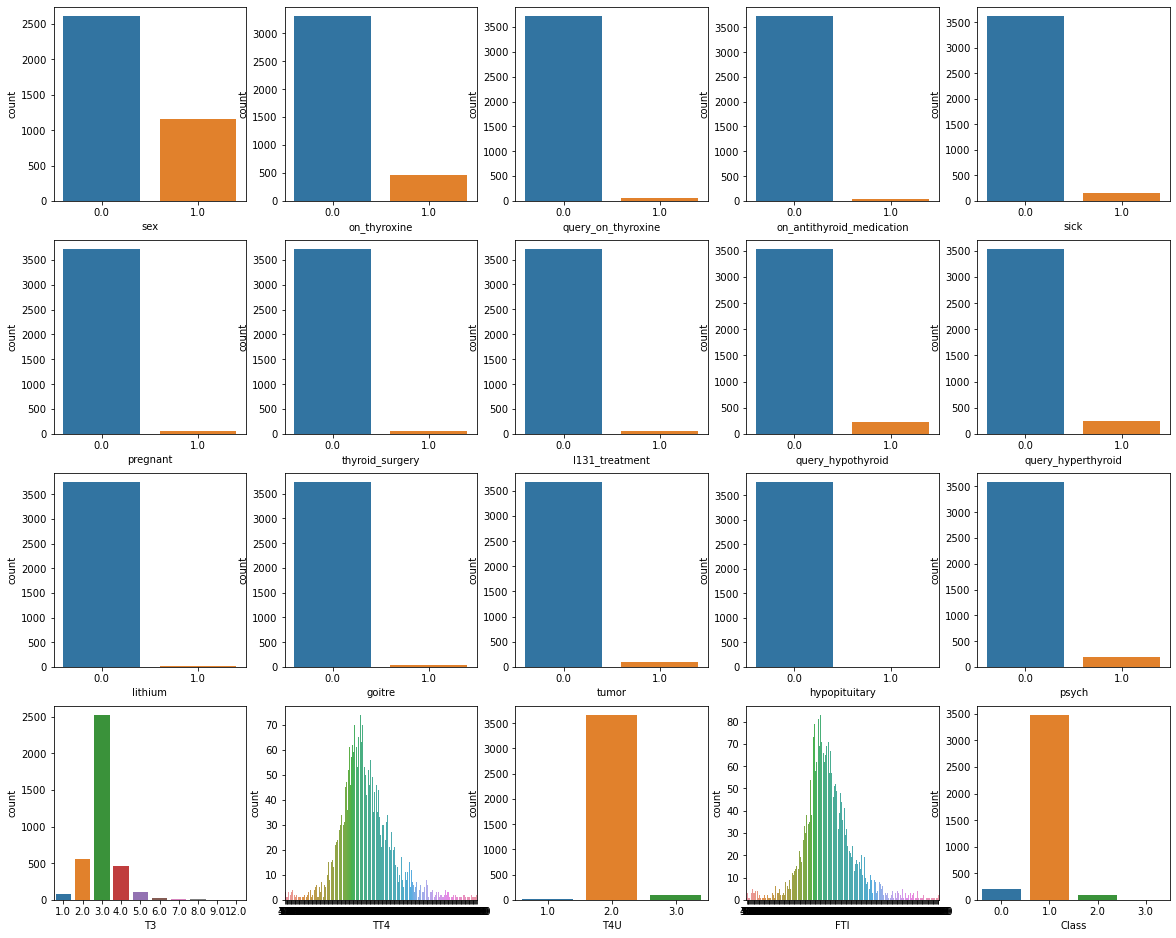

In [31]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
plt_data = df_p.drop(['age'], axis =1)

for column in plt_data:
    ax = plt.subplot(6,5,plotnumber)
    sns.countplot(plt_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

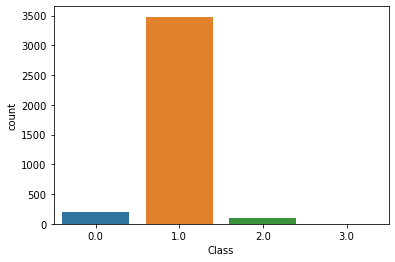

In [32]:
sns.countplot(df_p['Class'])

- We can clearly see that our data is highly imbalanced

In [33]:
df_p['Class'] = df['Class'].astype(int)

In [34]:
df_p

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,1
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,1
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,1
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,1
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,113.0,2.0,118.0,1
3768,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,125.0,2.0,115.0,1
3769,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,113.0,2.0,106.0,1
3770,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,83.0,2.0,88.0,1


In [35]:
x = df_p.drop('Class', axis=1)
y = df_p['Class']

In [36]:
df_p["Class"].value_counts()

1    3480
0     194
2      95
3       2
Name: Class, dtype: int64

- Balancing data by using RandomOverSampler

In [37]:
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [38]:
x_sampled.shape

(13920, 20)

In [39]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0


<AxesSubplot:xlabel='Class', ylabel='count'>

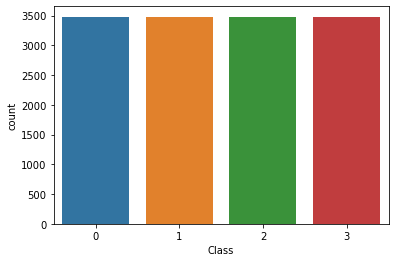

In [40]:
sns.countplot(y_sampled)